PMF: maps each value to its probability

In [23]:
import thinkstats2
import nsfg
import probability
import thinkplot

In [6]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [10]:
pmf.Prob(2)

## OR ##

pmf[2]

0.4

Modify an existing PMF by incrementing the probability associated with a value:

In [12]:
pmf.Incr(2, 0.2)
pmf[2]

0.8

Now values no longer add up to 1. You can renormalize by:

In [13]:
pmf.Normalize()
pmf.Total()

1.0000000000000002

Class Size Paradox

In [15]:
d = {7:8, 12:8, 17:14, 22:4, 27:6, 32:12, 
     37:8, 42:3, 47:2}

pmf = thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())

mean 23.692307692307693


In [18]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    
    new_pmf.Normalize()
    return new_pmf

In [20]:
BiasPmf(pmf,'label')

Pmf({7: 0.03636363636363637, 12: 0.062337662337662345, 17: 0.15454545454545457, 22: 0.05714285714285715, 27: 0.1051948051948052, 32: 0.24935064935064938, 37: 0.1922077922077922, 42: 0.08181818181818183, 47: 0.061038961038961045}, 'label')

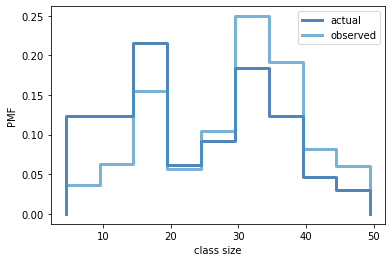

<Figure size 576x432 with 0 Axes>

In [24]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

In [25]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
    
    new_pmf.Normalize()
    return new_pmf

In [26]:
import numpy as np
import pandas

In [27]:
array = np.random.randn(4,2)
df = pandas.DataFrame(array)
df

,0,1
0,0.527529,0.017517
1,-0.184808,0.174197
2,-0.439730,-0.563649
3,-0.269169,-0.118055


In [29]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,0.527529,0.017517
1,-0.184808,0.174197
2,-0.439730,-0.563649
3,-0.269169,-0.118055


In [30]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,0.527529,0.017517
b,-0.184808,0.174197
c,-0.439730,-0.563649
d,-0.269169,-0.118055


In [31]:
df['A']

a    0.527529
b   -0.184808
c   -0.439730
d   -0.269169
Name: A, dtype: float64

In [32]:
df.loc['a']

A    0.527529
B    0.017517
Name: a, dtype: float64

In [33]:
df.iloc[0]

A    0.527529
B    0.017517
Name: a, dtype: float64

In [35]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,0.527529,0.017517
c,-0.439730,-0.563649


In [36]:
df['a':'c']

,A,B
a,0.527529,0.017517
b,-0.184808,0.174197
c,-0.439730,-0.563649


In [37]:
df[0:2]

,A,B
a,0.527529,0.017517
b,-0.184808,0.174197


In [38]:
def PercentineRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [39]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [41]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores) - 1) / 100
    return scores[index]

In [ ]:
def EvalCdf(t, x):
    count = 0.0
    for value in t:
        if value <= x:
            count += 1
    
    prob = count / len(t)
    return prob